
1.   Karan Patel 100812891
1.   Munjal Patel 100810810
2.   Yash Shah 100812896



In [2]:
import pandas as pd
data = pd .read_csv("dataset_agri_1_final.csv")
data.head()

,STATE,SOWNING SEASON,TEMP(°C),SOIL TYPE,CROP'S WATER NEED(mm),COST OF PRODUCTION(Rs/Qtl),YIELD(Qtl/ha),CROP TYPE
0,MP,WINTER,20,LOAM,900,400,40,DRY CHILLI
1,MP,WINTER,20,CLAY,850,450,42,DRY CHILLI
2,MP,SPRING,25,LOAM,910,500,43,DRY CHILLI
3,MP,SPRING,25,SANDY,1000,490,45,DRY CHILLI
4,UP,WINTER,22,LOAM,860,590,39,DRY CHILLI


In [3]:
data.nunique()

STATE                          4
SOWNING SEASON                 6
TEMP(°C)                      25
SOIL  TYPE                     4
CROP'S WATER NEED(mm)         74
COST OF PRODUCTION(Rs/Qtl)    90
YIELD(Qtl/ha)                 51
CROP TYPE                     10
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()
le_sowingseason = LabelEncoder()
le_soiltype = LabelEncoder()
le_croptype = LabelEncoder()


In [5]:
data['state_n'] = le_state.fit_transform(data['STATE'])
data['sowing_season_n'] = le_state.fit_transform(data['SOWNING SEASON'])
data['soiltype_n'] = le_state.fit_transform(data['SOIL  TYPE'])
data['croptype_n'] = le_state.fit_transform(data['CROP TYPE'])
data.head()

,STATE,SOWNING SEASON,TEMP(°C),SOIL TYPE,CROP'S WATER NEED(mm),COST OF PRODUCTION(Rs/Qtl),YIELD(Qtl/ha),CROP TYPE,state_n,sowing_season_n,soiltype_n,croptype_n
0,MP,WINTER,20,LOAM,900,400,40,DRY CHILLI,1,5,1,1
1,MP,WINTER,20,CLAY,850,450,42,DRY CHILLI,1,5,0,1
2,MP,SPRING,25,LOAM,910,500,43,DRY CHILLI,1,3,1,1
3,MP,SPRING,25,SANDY,1000,490,45,DRY CHILLI,1,3,2,1
4,UP,WINTER,22,LOAM,860,590,39,DRY CHILLI,3,5,1,1


In [6]:
x_croptype = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','croptype_n'],axis = 'columns')
y_croptype = data['croptype_n']

x_temp = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','TEMP(°C)'],axis = 'columns')
y_temp = data['TEMP(°C)']

x_soiltype = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','soiltype_n'],axis = 'columns')
y_soiltype = data['soiltype_n']

x_sowingseason = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','sowing_season_n'],axis = 'columns')
y_sowingseason = data['sowing_season_n']

x_need = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','CROP\'S WATER NEED(mm)'],axis = 'columns')
y_need = data['CROP\'S WATER NEED(mm)']

x_cost = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','COST OF PRODUCTION(Rs/Qtl)'],axis = 'columns')
y_cost =data['COST OF PRODUCTION(Rs/Qtl)']

x_yield = data.drop(['STATE','SOWNING SEASON','SOIL  TYPE','CROP TYPE','YIELD(Qtl/ha)'],axis = 'columns')
y_yield = data['YIELD(Qtl/ha)']

In [7]:
x_croptype

,TEMP(°C),CROP'S WATER NEED(mm),COST OF PRODUCTION(Rs/Qtl),YIELD(Qtl/ha),state_n,sowing_season_n,soiltype_n
0,20,900,400,40,1,5,1
1,20,850,450,42,1,5,0
2,25,910,500,43,1,3,1
3,25,1000,490,45,1,3,2
4,22,860,590,39,3,5,1
...,...,...,...,...,...,...,...
94,27,1050,1560,53,1,1,1
95,31,1300,1610,58,1,4,3
96,29,1350,1555,52,0,1,0
97,30,1250,1540,55,0,1,0


In [8]:
y_croptype

0     1
1     1
2     1
3     1
4     1
     ..
94    6
95    6
96    6
97    6
98    6
Name: croptype_n, Length: 99, dtype: int64

## KNN

In [9]:
x = x_croptype
y = y_croptype
print(x.shape)
print(y.shape)

(99, 7)
(99,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(69, 7)
(30, 7)
(69,)
(30,)


In [12]:
from sklearn import metrics
k_range = range(1,26)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)

[1.0, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9, 0.9, 0.7666666666666667, 0.7666666666666667, 0.5333333333333333, 0.5, 0.4666666666666667, 0.4666666666666667, 0.3333333333333333, 0.3333333333333333, 0.3, 0.26666666666666666, 0.26666666666666666, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334]


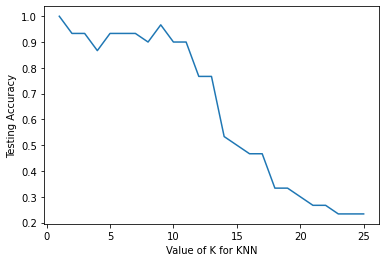

In [13]:
import matplotlib.pyplot as plt

#plot the relationship between K and testing accuracy
plt.plot(k_range,scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [15]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()

DT_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_pred1 = DT_model.predict(x_test)

print(metrics.accuracy_score(y_test,y_pred1))

0.9666666666666667


## Recommendation System

In [17]:
knn_model_croptype = KNeighborsClassifier(n_neighbors=1)
knn_model_croptype.fit(x,y)

knn_model_temp = KNeighborsClassifier(n_neighbors=1)
knn_model_temp.fit(x_temp,y_temp)

knn_model_season = KNeighborsClassifier(n_neighbors=1)
knn_model_season.fit(x_sowingseason,y_sowingseason)

knn_model_need = KNeighborsClassifier(n_neighbors=1)
knn_model_need.fit(x_need,y_need)

knn_model_cost = KNeighborsClassifier(n_neighbors=1)
knn_model_cost.fit(x_cost,y_cost)

knn_model_soiltype = KNeighborsClassifier(n_neighbors=1)
knn_model_soiltype.fit(x_soiltype,y_soiltype)

knn_model_yield = KNeighborsClassifier(n_neighbors=1)
knn_model_yield.fit(x_yield,y_yield)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
    def croptype_pred():
      print("Hello Farmer!\nPlease Enter the details and we will guide you which crop you should grow at your farm.....\n")
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,water,cost,production,state,season,soil])
      crop_prediction = knn_model_croptype.predict([test_sample])
      if crop_prediction==0:
        print("You should grow COTTON in your farm")
      elif crop_prediction==1:
        print("You should grow DRY CHILLI in your farm")
      elif crop_prediction==2:
        print("You should grow GARLIC in your farm")
      elif crop_prediction==3:
        print("You should grow GREENGRAM in your farm")
      elif crop_prediction==4:
        print("You should grow GROUNDNUT in your farm")
      elif crop_prediction==5:
        print("You should grow MILLET in your farm")
      elif crop_prediction==6:
        print("You should grow RICE in your farm")
      elif crop_prediction==7:
        print("You should grow SOYABEAN in your farm")
      elif crop_prediction==8:
        print("You should grow SUGARCANE in your farm")
      elif crop_prediction==9:
        print("You should grow WHEAT in your farm")

In [19]:
    def temp_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("Please select the croptype from above which are you planning to sown,select 0-9 ----")))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([water,cost,production,state,season,soil,croptype])
      pre_temp = knn_model_temp.predict([test_sample])
      print("your predicted temperature(degree calcius) is:",pre_temp)

In [20]:
    def need_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("Please select the croptype from above which are you planning to sown,select 0-9 ----")))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,cost,production,state,season,soil,croptype])
      pre_need = knn_model_need.predict([test_sample])
      print("your predicted water need(in mm) is:",pre_need)

In [21]:
    def season_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      #print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter\n")
      #season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("please select the croptype from above which are you planning to sown,select 0-9 ----")))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,water,cost,production,state,soil,croptype])
      pre_season = knn_model_season.predict([test_sample])
      if pre_season==0:
        print("best season for your crop is AUTUMN")
      elif pre_season==1:
        print("best season for your crop is MONSOON")
      elif pre_season==2:
        print("best season for your crop is PRE-WINTER")
      elif pre_season==3:
        print("best season for your crop is SPRING")
      elif pre_season==4:
        print("best season for your crop is SUMMER")
      elif pre_season==5:
        print("best season for your crop is WINTER")

In [22]:
    def cost_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("please select the croptype from above which are you planning to sown,select 0-9 ----")))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,water,production,state,season,soil,croptype])
      pre_cost = knn_model_cost.predict([test_sample])
      print("your predicted cost of production is:",pre_cost)

In [23]:
    def soiltype_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("Please select the croptype from above which are you planning to sown,select 0-9 ----")))
      #print("\n0 : Clay\n 1 : Loam\n 2 : Sandy\n 3 : Silt\n")
      #soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      production = float(input("\nHow much quintal yield you want per hectare? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,water,cost,production,state,season,croptype])
      pre_soiltype = knn_model_soiltype.predict([test_sample])
      if pre_soiltype==0:
        print("best soil for your crop is CLAY")
      elif pre_soiltype==1:
        print("best soil for your crop is LOAM")
      elif pre_soiltype==2:
        print("best soil for your crop is SANDY")
      elif pre_soiltype==3:
        print("best soil for your crop is SLIT")

In [24]:
    def yield_pred():
      print("\n0 : Gujarat\n1 : MadhyaPradesh\n2 : Rajastan\n3 : UttarPradesh")
      state = int(input("Are you in which state? From above, please enter 0-3 ---- "))
      print("\n0 : Autumn\n1 : Monsoon\n2 : Pre-winter\n3 : Spring\n4 : Summer\n5 : Winter")
      season = int(input("In which season you want to grow your crop? From above, please enter 0-5 ---- "))
      print("\n0 : cotton\n1 : dry chilli\n2 : garlic\n3 : greengram\n4 : groundnut\n5 : millet\n6 : rice\n7 : soyabean\n8 : sugarcane\n9 : wheat")
      croptype = int(input(print("Please select the croptype from above which are you planning to sown,select 0-9 ----")))
      print("\n0 : Clay\n1 : Loam\n2 : Sandy\n3 : Silt")
      soil = int(input("What is the soil type? From above, please select 0-3 ---- "))
      water = int(input("\nHow much water(in mm) will be available to farm approximately? ---- "))
      temp = int(input("\nWhat will be the temperature while sowing in °C? ---- "))
      cost = int(input("\nWhat is your budget per Quintal? ---- "))
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([temp,water,cost,state,season,soil,croptype])
      pre_yield = knn_model_yield.predict([test_sample])
      print("your predicted yield is:",pre_yield)

In [27]:
while True:
  print("\n1.temparature\n2.crop's water need(mm)\n3.sowing season\n4.cost of production(rs/qtl)\n5.yield(qtl/ha)\n6.soil type\n7.crop type\n8.exit")
  number = int(input(print("Hello farmers!! Which information you need? Please select from options...")))
  if number == 1:
    temp_pred()
  elif number == 2:
    need_pred()
  elif number == 3:
    season_pred()
  elif number == 4:
    cost_pred()
  elif number == 5:
    yield_pred()
  elif number == 6:
    soiltype_pred()
  elif number == 7:
    croptype_pred()
  else:
    break
    exit()


1.temparature
2.crop's water need(mm)
3.sowing season
4.cost of production(rs/qtl)
5.yield(qtl/ha)
6.soil type
7.crop type
8.exit
Hello farmers!! Which information you need? Please select from options...
3

0 : Gujarat
1 : MadhyaPradesh
2 : Rajastan
3 : UttarPradesh
Are you in which state? From above, please enter 0-3 ---- 3

0 : cotton
1 : dry chilli
2 : garlic
3 : greengram
4 : groundnut
5 : millet
6 : rice
7 : soyabean
8 : sugarcane
9 : wheat
please select the croptype from above which are you planning to sown,select 0-9 ----
8

0 : Clay
1 : Loam
2 : Sandy
3 : Silt
What is the soil type? From above, please select 0-3 ---- 0

How much water(in mm) will be available to farm approximately? ---- 2000

What will be the temperature while sowing in °C? ---- 25

What is your budget per Quintal? ---- 220

How much quintal yield you want per hectare? ---- 1000


PREDICTION.................................

best season for your crop is AUTUMN

1.temparature
2.crop's water need(mm)
3.sowing se